In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio


<h1>np.fromfile() vs mio.MuramTauSlice() loading data</h1>

In [91]:
# Firstly, we import data from one cube using np.fromfile method because it is binary file in nature
# TAU = 1.0!!!!!
cube = np.fromfile("tau_slice_1.000.000000", dtype = "float32")

In [92]:
cube.shape

(25952260,)

In [93]:
# Reshape it
cube = cube[4:].reshape(11, 1536, 1536)

In [7]:
cube.shape

(11, 1536, 1536)

In [8]:
# Knowing that, we will now test mio.MuramTauSlice
cube_muram = mio.MuramTauSlice('',00000, 1.0)

In [9]:
cube_muram.shape

(11, 1536, 1536)

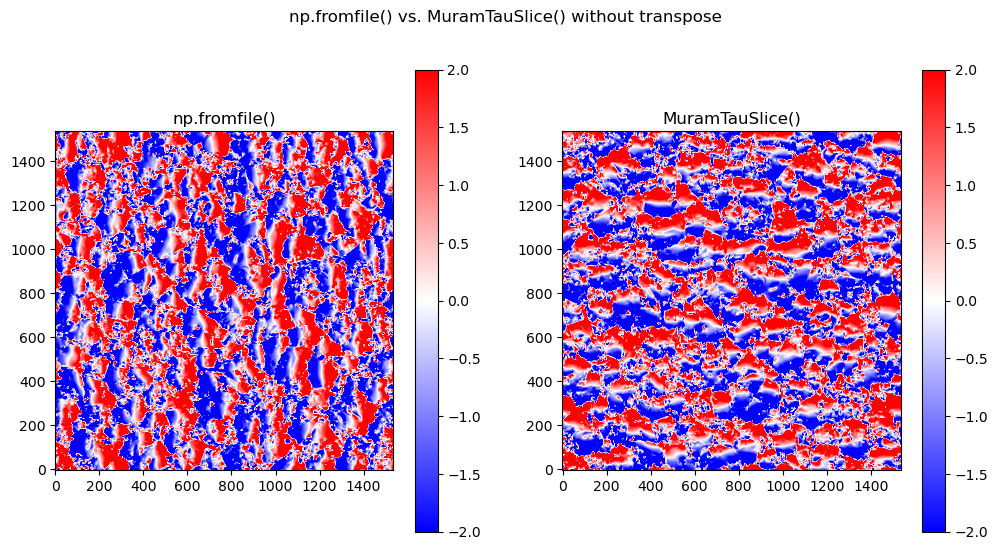

In [94]:
# Plot both cubes; i.e plot correspoding indices to see if they match
# Is this Vx??
fig = plt.figure(figsize = (12,6))
fig.suptitle("np.fromfile() vs. MuramTauSlice() without transpose")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(cube[2, :, :]/1E5, origin='lower',cmap='bwr', vmin = -2, vmax = 2)
ax1.set_title("np.fromfile()") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(cube_muram[2, :, :]/1E5, origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("MuramTauSlice()") 
fig.colorbar(im2)

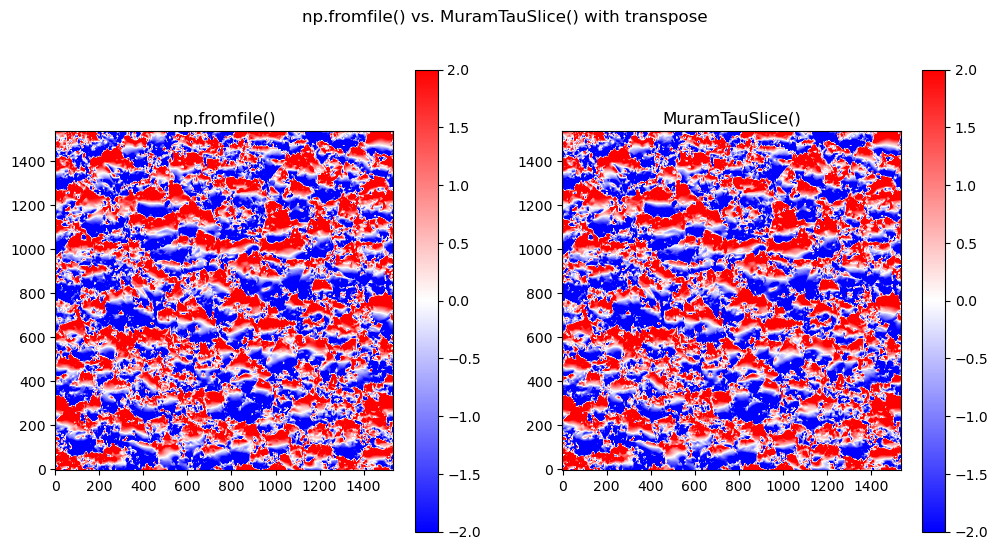

In [88]:
# Plot both cubes; i.e plot correspoding indices to see if they match
# Is this Vx??
fig = plt.figure(figsize = (12,6))
fig.suptitle("np.fromfile() vs. MuramTauSlice() with transpose")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(cube[2, :, :].T/1E5, origin='lower',cmap='bwr', vmin = -2, vmax = 2)
ax1.set_title("np.fromfile()") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(cube_muram[2, :, :]/1E5, origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("MuramTauSlice()") 
fig.colorbar(im2)

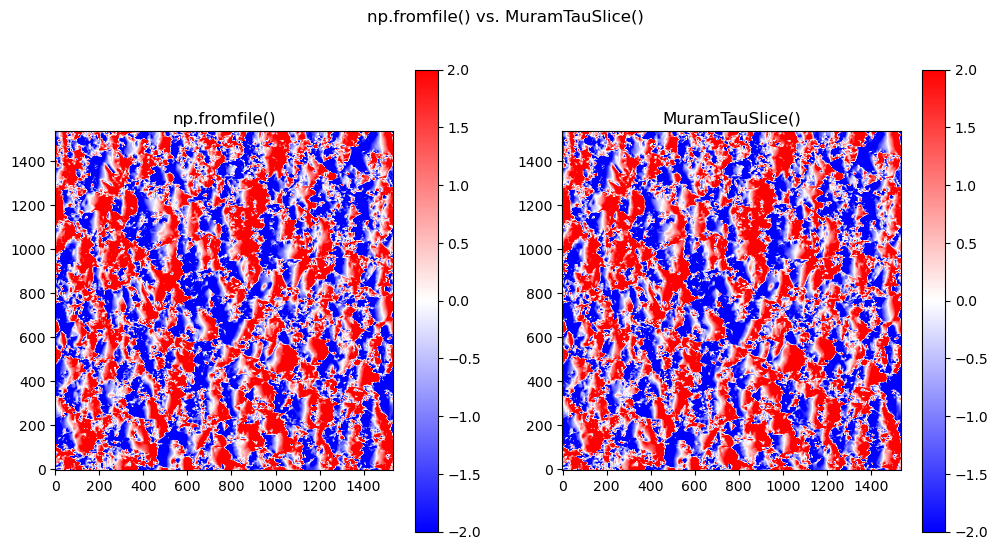

In [89]:
# Plot both cubes; i.e plot correspoding indices to see if they match
# for cube[3,:,:] we thought we are dealing with Vy
fig = plt.figure(figsize = (12,6))
fig.suptitle("np.fromfile() vs. MuramTauSlice()")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(cube[3, :, :].T/1E5, origin='lower',cmap='bwr', vmin = -2, vmax = 2)
ax1.set_title("np.fromfile()") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(cube_muram[3, :, :]/1E5, origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("MuramTauSlice()") 
fig.colorbar(im2)

In [16]:
import sys
import os
import pyflct
from scipy.stats import pearsonr
from astropy.io import fits

In [17]:
Int_series_vx = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[0].data # Vx
Int_series_vy = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[1].data # Vy

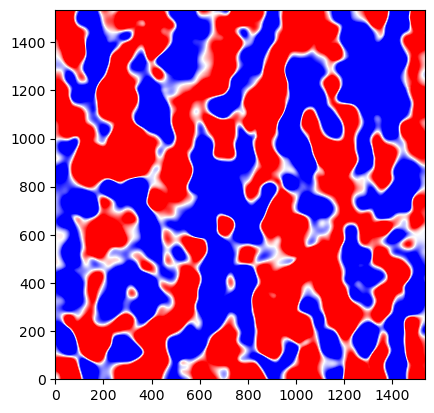

In [23]:
plt.imshow(Int_series_vx[0,:,:], origin = "lower", cmap = "bwr", vmin = -0.1, vmax = 0.1)

<h1>Only transposing plotted output</h1>
<p>
    Basically FLCT Vx corresponds to Simulation Vy.T.
</p>

In [18]:
# Define functions for temporal and spatial averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [142]:
Vx = fits.open("Velocities.fits")[0].data
Vy = fits.open("Velocities.fits")[1].data

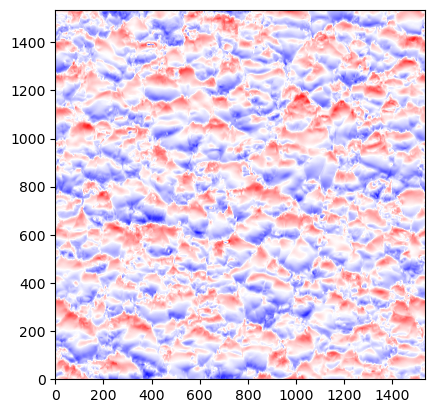

In [143]:
plt.imshow(Vx[0,:,:].T, origin = "lower", cmap = "bwr")

In [144]:
Vx_mean_FLCT = temporal_avg(Int_series_vx, 0, 180)
Vy_mean_FLCT = temporal_avg(Int_series_vy, 0, 180)

In [145]:
Vx_mean_sim = temporal_avg(Vx, 0, 180) # simulation
Vx_mean_sim = Vx_mean_sim/1E5

In [146]:
Vy_mean_sim = temporal_avg(Vy, 0, 180) # simulation
Vy_mean_sim = Vy_mean_sim/1E5

In [147]:
from scipy.ndimage import gaussian_filter
Vx_mean_filtered35 = gaussian_filter(Vx_mean_sim, 35, mode = "wrap")
Vy_mean_filtered35 = gaussian_filter(Vy_mean_sim, 35, mode = "wrap")

In [148]:
r_x = pearsonr(Vx_mean_FLCT.flatten(), Vy_mean_filtered35.T.flatten()) 
print(r_x)

PearsonRResult(statistic=0.8873157838567132, pvalue=0.0)


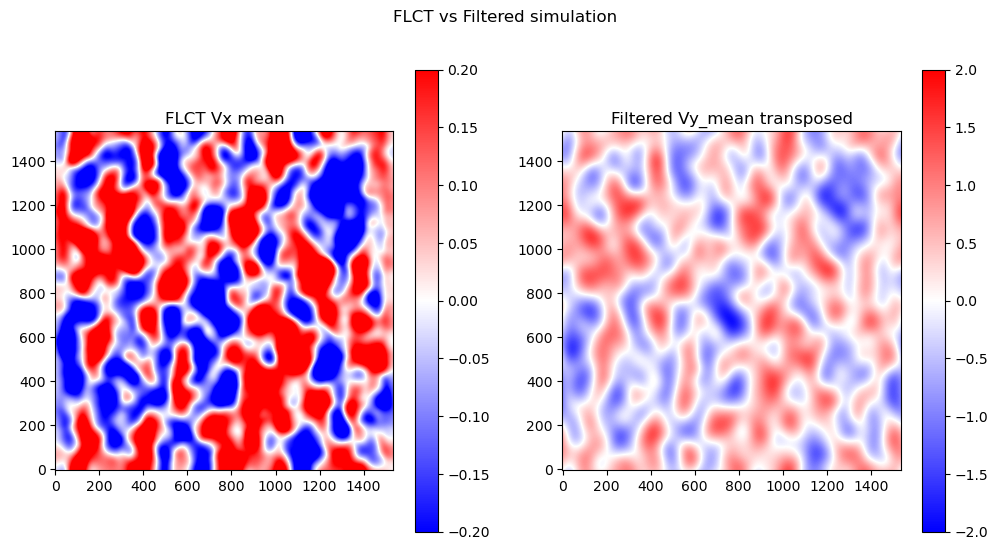

In [149]:
# Plot both cubes; i.e plot correspoding indices to see if they match
# Is this Vx??
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs Filtered simulation")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_mean_FLCT[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx mean") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vy_mean_filtered35[:, :].T, origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("Filtered Vy_mean transposed") 
fig.colorbar(im2)

<h1>What if we transpose?</h1>
<p>
    Here both Vx and Vy are tranposed as (0, 2, 1), but FLCT Vx is plotted against Simulation Vy rather than Vy.T.
</p>

In [90]:
# What we have designated as Vx = fits.open("Velocities.fits")[0].data
# is most probably Vy in reality

In [150]:
Vx = fits.open("Velocities.fits")[0].data
Vx = Vx.transpose(0, 2, 1)

In [151]:
Vx.shape

(361, 1536, 1536)

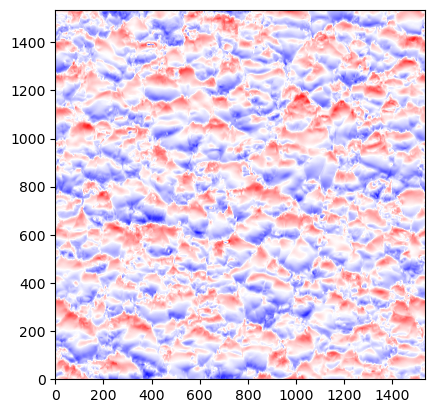

In [152]:
plt.imshow(Vx[0,:,:], origin = "lower", cmap = "bwr")

In [153]:
Vy = fits.open("Velocities.fits")[1].data
Vy = Vy.transpose(0, 2, 1)

In [154]:
Vx_mean_FLCT = temporal_avg(Int_series_vx, 0, 180)
Vy_mean_FLCT = temporal_avg(Int_series_vy, 0, 180)

In [155]:
Vx_mean_sim = temporal_avg(Vx, 0, 180) # simulation
Vx_mean_sim = Vx_mean_sim/1E5

In [156]:
Vy_mean_sim = temporal_avg(Vy, 0, 180) # simulation
Vy_mean_sim = Vy_mean_sim/1E5

In [157]:
Vx_mean_filtered35 = gaussian_filter(Vx_mean_sim, 35, mode = "wrap")
Vy_mean_filtered35 = gaussian_filter(Vy_mean_sim, 35, mode = "wrap")

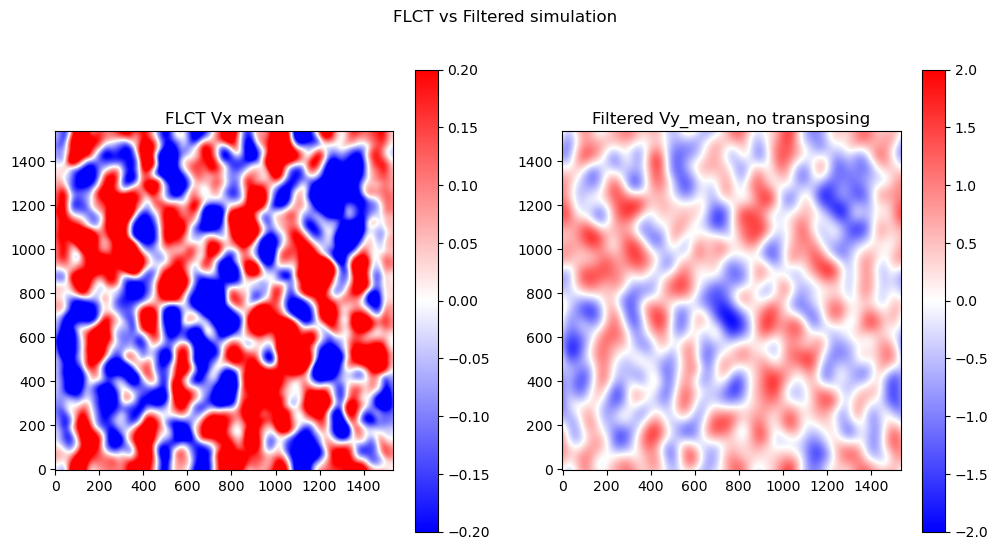

In [158]:
# Plot both cubes; i.e plot correspoding indices to see if they match
# Is this Vx??
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs Filtered simulation")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_mean_FLCT[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx mean") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vy_mean_filtered35[:, :], origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("Filtered Vy_mean, no transposing") 
fig.colorbar(im2)

<h1>What if change the Vx and Vy + transpose?</h1>
<p>
    Here we say Vx = Vy essentially. We assign what we thought are Vy values from Velocities.fits to variable that represents Vx.<br>
    This is done in order to have FLCT Vx match Vx from simulation. We still use transpose(0, 2, 1).
</p>

In [166]:
Vx = fits.open("Velocities.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

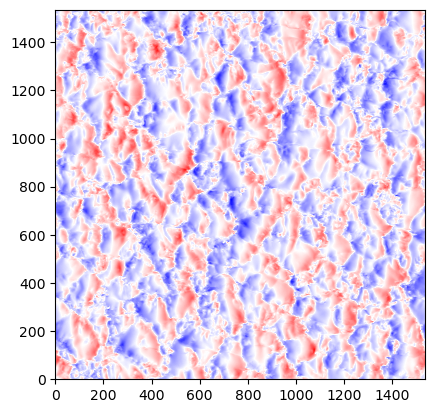

In [167]:
plt.imshow(Vx[0,:,:], origin = "lower", cmap = "bwr")

In [168]:
Vx_mean_FLCT = temporal_avg(Int_series_vx, 0, 180)
Vy_mean_FLCT = temporal_avg(Int_series_vy, 0, 180)

In [169]:
Vx_mean_sim = temporal_avg(Vx, 0, 180) # simulation
Vx_mean_sim = Vx_mean_sim/1E5

In [170]:
Vy_mean_sim = temporal_avg(Vy, 0, 180) # simulation
Vy_mean_sim = Vy_mean_sim/1E5

In [171]:
Vx_mean_filtered35 = gaussian_filter(Vx_mean_sim, 35, mode = "wrap")
Vy_mean_filtered35 = gaussian_filter(Vy_mean_sim, 35, mode = "wrap")

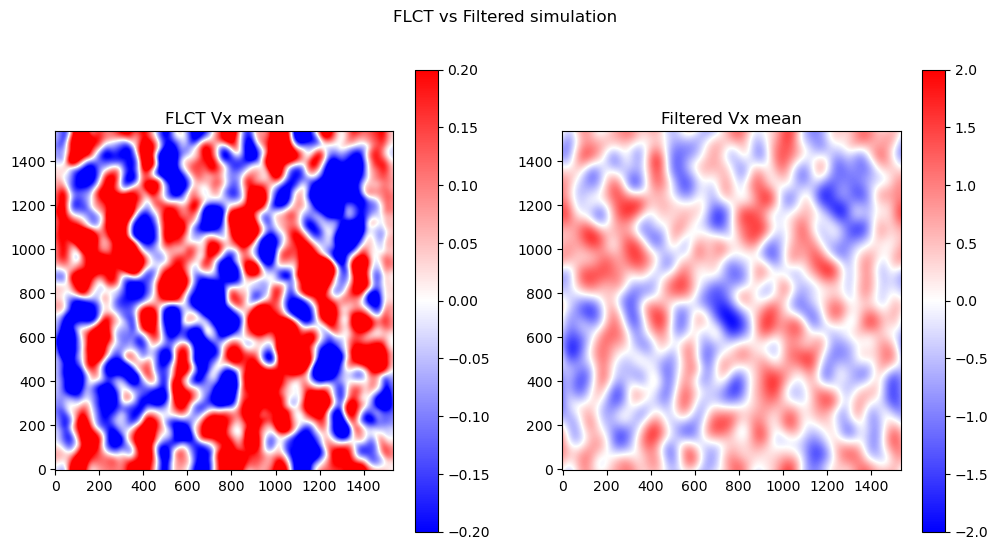

In [172]:
# Plot both cubes; i.e plot correspoding indices to see if they match
# Is this Vx??
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs Filtered simulation")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_mean_FLCT[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx mean") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_filtered35[:, :], origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("Filtered Vx mean") 
fig.colorbar(im2)